In [2]:
#%% load dataset
import pandas as pd


df = pd.read_csv('dados_disciplinas.txt')


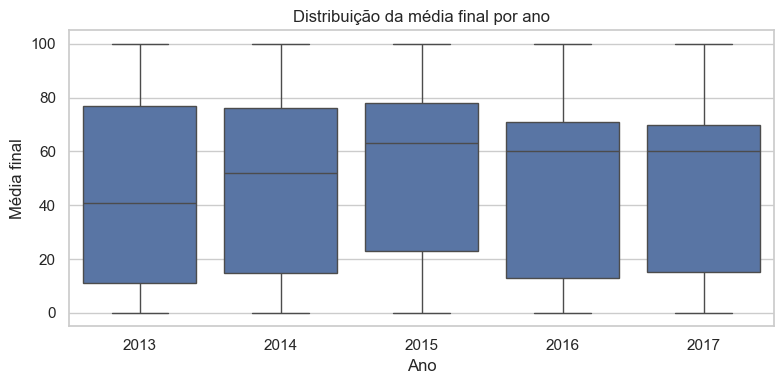

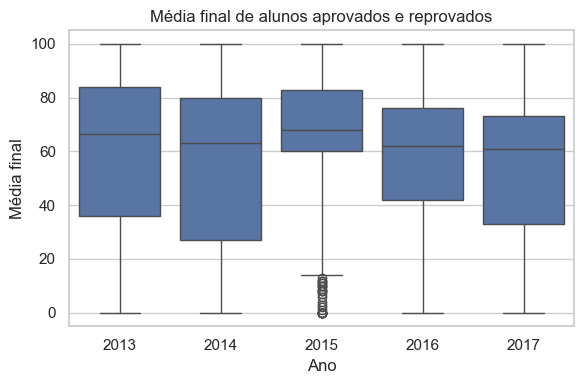

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo geral do seaborn
sns.set(style="whitegrid")

# 1) Filtrar médias válidas (tirar valores -1, que indicam ausência de nota)
df_validas = df[df['MEDIA_FINAL'] >= 0]

# --- Boxplot da média final por ano ---
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_validas,
    x='ANO',
    y='MEDIA_FINAL'
)
plt.title('Distribuição da média final por ano')
plt.xlabel('Ano')
plt.ylabel('Média final')
plt.tight_layout()

# 2) Boxplot apenas dos alunos Aprovados e Reprovados
df_aprov_reprov = df[df['SITUACAO'].isin(['Aprovado', 'Reprovado'])]

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_aprov_reprov,
    x='ANO',
    y='MEDIA_FINAL',
    whis=2
)
plt.title('Média final de alunos aprovados e reprovados')
plt.xlabel('Ano')
plt.ylabel('Média final')
plt.tight_layout()

plt.show()

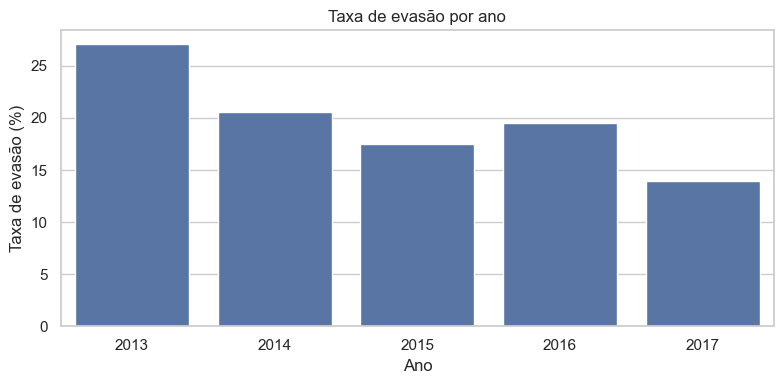

    ANO  total_matriculas  total_evasoes  taxa_evasao
0  2013               957            259    27.063741
1  2014               987            203    20.567376
2  2015               762            133    17.454068
3  2016               997            195    19.558676
4  2017               939            131    13.951012


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# 1) Definir o que é evasão
# Ajuste os textos abaixo se no seu df a coluna SITUACAO tiver grafias diferentes
cond_evasao = df['SITUACAO'].isin([
    'Reprovado por Frequencia',
    'Trancamento Parcial'
])

# 2) Total de matrículas por ano
total_por_ano = df.groupby('ANO').size().rename('total_matriculas')

# 3) Total de evasões por ano
evasao_por_ano = df[cond_evasao].groupby('ANO').size().rename('total_evasoes')

# 4) Juntar e calcular a taxa (%)
taxa_evasao_ano = (
    pd.concat([total_por_ano, evasao_por_ano], axis=1)
    .fillna(0)  # anos sem evasão ficam com 0
    .reset_index()
)

taxa_evasao_ano['taxa_evasao'] = (
    taxa_evasao_ano['total_evasoes'] / taxa_evasao_ano['total_matriculas'] * 100
)

# 5) Plotar taxa de evasão por ano
plt.figure(figsize=(8, 4))
sns.barplot(
    data=taxa_evasao_ano,
    x='ANO',
    y='taxa_evasao'
)

plt.title('Taxa de evasão por ano')
plt.xlabel('Ano')
plt.ylabel('Taxa de evasão (%)')
plt.tight_layout()
plt.show()

# (Opcional) ver a tabela no console
print(taxa_evasao_ano)

In [7]:
# 1) Definir condição de evasão
cond_evasao = df['SITUACAO'].isin([
    'Reprovado por Frequencia',
    'Trancamento parcial'
])

# 2) Total de matrículas por disciplina-ano-semestre
total_por_grupo = (
    df
    .groupby(['DISCIPLINA', 'ANO', 'PERIODO'])
    .size()
    .rename('total_matriculas')
)

# 3) Total de evasões por disciplina-ano-semestre
evasao_por_grupo = (
    df[cond_evasao]
    .groupby(['DISCIPLINA', 'ANO', 'PERIODO'])
    .size()
    .rename('total_evasoes')
)

# 4) Tabela com totais + evasões
tabela_taxas = (
    pd.concat([total_por_grupo, evasao_por_grupo], axis=1)
    .fillna(0)              # onde não houve evasão, fica 0
    .reset_index()
)

# 5) Calcular taxa de evasão (%)
tabela_taxas['taxa_evasao'] = (
    tabela_taxas['total_evasoes'] /
    tabela_taxas['total_matriculas'] * 100
)

# 6) Calcular média das médias (AGORA sem evasão)
#    - Considera apenas médias válidas (>= 0)
#    - Remove casos de evasão (Reprovado por Frequencia + Trancamento parcial)
df_medias = df[
    (df['MEDIA_FINAL'] >= 0) &
    (~cond_evasao)
]

medias_por_grupo = (
    df_medias
    .groupby(['DISCIPLINA', 'ANO', 'PERIODO'])['MEDIA_FINAL']
    .mean()
    .reset_index(name='media')
)

# 7) Juntar médias com taxa de evasão
resultado = pd.merge(
    tabela_taxas,
    medias_por_grupo,
    on=['DISCIPLINA', 'ANO', 'PERIODO'],
    how='left'
)

# 8) Renomear colunas e selecionar as finais
resultado_final = resultado.rename(columns={
    'DISCIPLINA': 'disciplina',
    'ANO': 'ano',
    'PERIODO': 'semestre'
})[['disciplina', 'ano', 'semestre', 'media', 'taxa_evasao']]

# (Opcional) ordenar
resultado_final = resultado_final.sort_values(['disciplina', 'ano', 'semestre'])

print(resultado_final)

    disciplina   ano  semestre      media  taxa_evasao
0            1  2013         1  87.516129    14.814815
1            1  2013         2  86.078947    26.086957
2            1  2014         1  77.962264    13.235294
3            1  2014         2  80.303571    16.049383
4            1  2015         1  86.294118    15.492958
5            1  2015         2  68.666667    26.086957
6            1  2016         1  63.054545    16.666667
7            1  2016         2  83.821429     8.974359
8            1  2017         1  63.676471     6.250000
9            1  2017         2  57.000000    10.256410
10           2  2013         1  47.032967    28.472222
11           2  2013         2  49.159420    39.259259
12           2  2014         1  56.549296    33.884298
13           2  2014         2  42.391892    26.400000
14           2  2015         1  59.158730    31.858407
15           2  2015         2  54.072727    12.676056
16           2  2016         1  53.729730    33.333333
17        

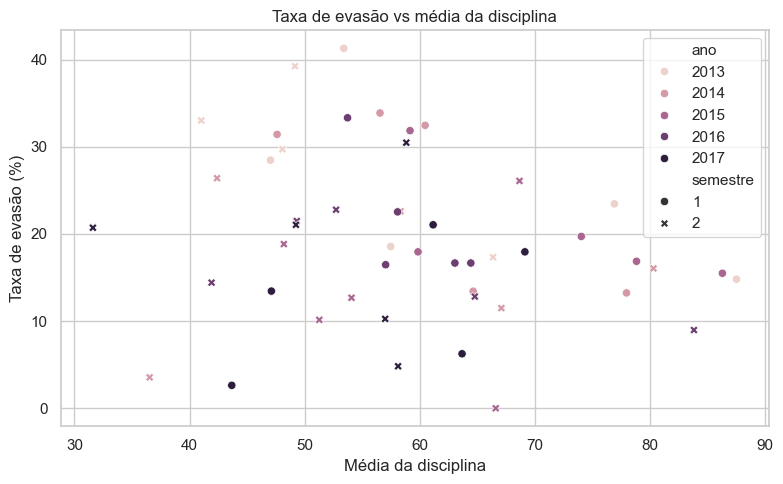

   disciplina   ano  semestre      media  taxa_evasao
0           1  2013         1  87.516129    14.814815
1           1  2013         2  86.078947    26.086957
2           1  2014         1  77.962264    13.235294
3           1  2014         2  80.303571    16.049383
4           1  2015         1  86.294118    15.492958


In [8]:
#%%
# Garantir que não haja NaN nos campos usados
dados_plot = resultado_final.dropna(subset=['media', 'taxa_evasao'])

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=dados_plot,
    x='media',
    y='taxa_evasao',
    hue='ano',
    style='semestre',
)

plt.title('Taxa de evasão vs média da disciplina')
plt.xlabel('Média da disciplina')
plt.ylabel('Taxa de evasão (%)')
plt.tight_layout()
plt.show()

print(dados_plot[['disciplina', 'ano', 'semestre', 'media', 'taxa_evasao']].head())

=== Regressão linear: taxa_evasao ~ media ===
Inclinação (beta1): -0.1297
Intercepto (beta0): 27.3491
Coeficiente de correlação (r): -0.1823
R²: 0.0332
Erro padrão da inclinação: 0.1009
p-valor da inclinação: 0.205

=== Teste de hipótese para a tendência ===
H0: beta1 = 0 (não há tendência linear entre média e evasão)
H1: beta1 ≠ 0 (há tendência linear)
Rejeitamos H0 ao nível de 21%.
→ Há evidência estatística de tendência linear entre média da disciplina e taxa de evasão.


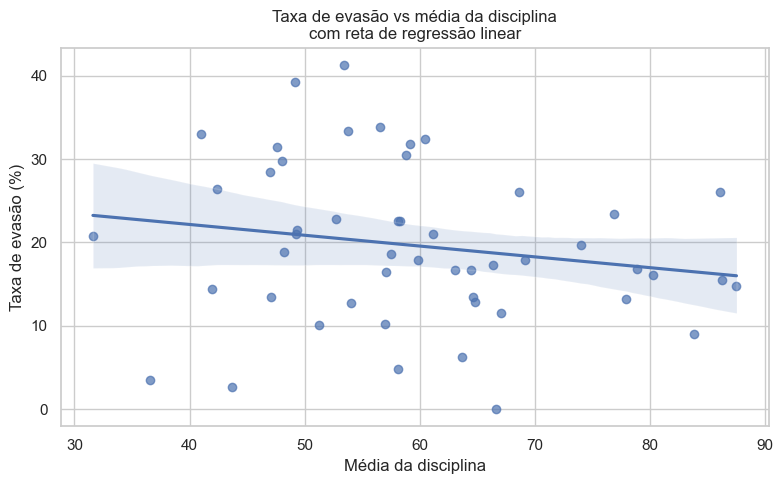

In [15]:
#%%

from scipy.stats import linregress

# 1) Preparar dados: remover possíveis NaN
dados_reg = resultado_final.dropna(subset=['media', 'taxa_evasao'])

# X = média da disciplina, Y = taxa de evasão
x = dados_reg['media']
y = dados_reg['taxa_evasao']

# 2) Regressão linear simples
reg = linregress(x, y)

# 3) Mostrar resultados da regressão
print('=== Regressão linear: taxa_evasao ~ media ===')
print(f'Inclinação (beta1): {reg.slope:.4f}')
print(f'Intercepto (beta0): {reg.intercept:.4f}')
print(f'Coeficiente de correlação (r): {reg.rvalue:.4f}')
print(f'R²: {reg.rvalue**2:.4f}')
print(f'Erro padrão da inclinação: {reg.stderr:.4f}')
print(f'p-valor da inclinação: {reg.pvalue:.4g}')

# 4) Teste de hipótese para a inclinação
alpha = 0.21  # nível de significância (5%)

print('\n=== Teste de hipótese para a tendência ===')
print('H0: beta1 = 0 (não há tendência linear entre média e evasão)')
print('H1: beta1 ≠ 0 (há tendência linear)')

if reg.pvalue < alpha:
    print(f'Rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Há evidência estatística de tendência linear entre média da disciplina e taxa de evasão.')
else:
    print(f'Não rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Não há evidência estatística suficiente de tendência linear.')

# 5) Plotar pontos + reta de regressão
plt.figure(figsize=(8, 5))
sns.regplot(
    x=x,
    y=y,
    ci=95,            # intervalo de confiança da reta
    scatter_kws={'alpha': 0.7}
)

plt.title('Taxa de evasão vs média da disciplina\ncom reta de regressão linear')
plt.xlabel('Média da disciplina')
plt.ylabel('Taxa de evasão (%)')
plt.tight_layout()
plt.show()

=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===
Inclinação (beta1): -1.4567
Intercepto (beta0): 66.3530
Coeficiente de correlação (r): -0.2829
R²: 0.0801
Erro padrão da inclinação: 0.0874
p-valor da inclinação: 7.277e-60

=== Teste de hipótese para a tendência ===
H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)
H1: beta1 ≠ 0 (há relação linear entre faltas e média)
Rejeitamos H0 ao nível de 5%.
→ Há evidência estatística de tendência linear entre número de faltas e média final.


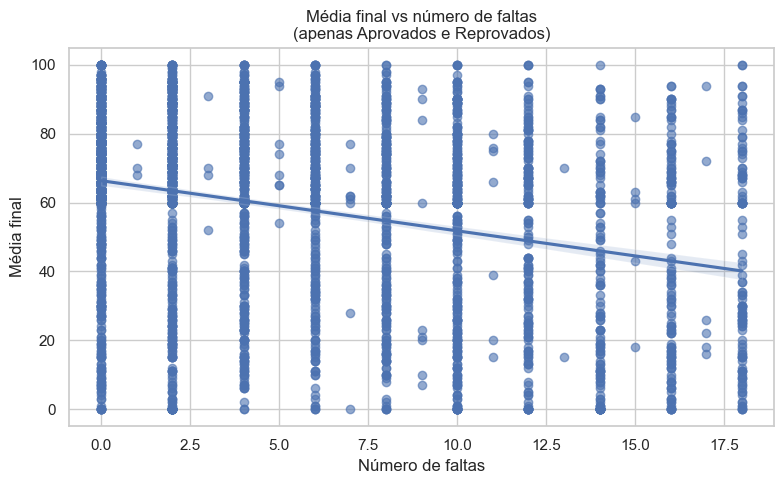

   MATR_ALUNO  SITUACAO  NUM_FALTAS  MEDIA_FINAL
0           1  Aprovado          12           77
3           4  Aprovado           2           60
4           4  Aprovado           2           68
5           5  Aprovado           4           60
6           5  Aprovado           8           97


In [10]:
#%% 

# 1) Filtrar apenas alunos Aprovados e Reprovados
df_reg = df[df['SITUACAO'].isin(['Aprovado', 'Reprovado'])].copy()

# 2) Remover possíveis NaN nas variáveis de interesse
df_reg = df_reg.dropna(subset=['NUM_FALTAS', 'MEDIA_FINAL'])

# 3) Definir X (faltas) e Y (média final)
x = df_reg['NUM_FALTAS']
y = df_reg['MEDIA_FINAL']

# 4) Regressão linear simples: MEDIA_FINAL ~ NUM_FALTAS
reg = linregress(x, y)

print('=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===')
print(f'Inclinação (beta1): {reg.slope:.4f}')
print(f'Intercepto (beta0): {reg.intercept:.4f}')
print(f'Coeficiente de correlação (r): {reg.rvalue:.4f}')
print(f'R²: {reg.rvalue**2:.4f}')
print(f'Erro padrão da inclinação: {reg.stderr:.4f}')
print(f'p-valor da inclinação: {reg.pvalue:.4g}')

# 5) Teste de hipótese para a inclinação
alpha = 0.05  # nível de significância

print('\n=== Teste de hipótese para a tendência ===')
print('H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)')
print('H1: beta1 ≠ 0 (há relação linear entre faltas e média)')

if reg.pvalue < alpha:
    print(f'Rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Há evidência estatística de tendência linear entre número de faltas e média final.')
else:
    print(f'Não rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Não há evidência estatística suficiente de tendência linear.')

# 6) Plotar pontos + reta de regressão
plt.figure(figsize=(8, 5))
sns.regplot(
    x=x,
    y=y,
    ci=95,                 # intervalo de confiança da reta
    scatter_kws={'alpha': 0.6}
)

plt.title('Média final vs número de faltas\n(apenas Aprovados e Reprovados)')
plt.xlabel('Número de faltas')
plt.ylabel('Média final')
plt.tight_layout()
plt.show()

# (Opcional) ver algumas linhas
print(df_reg[['MATR_ALUNO', 'SITUACAO', 'NUM_FALTAS', 'MEDIA_FINAL']].head())

=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===
Inclinação (beta1): -0.1091
Intercepto (beta0): 75.8059
Coeficiente de correlação (r): -0.0437
R²: 0.0019
Erro padrão da inclinação: 0.0547
p-valor da inclinação: 0.04628

=== Teste de hipótese para a tendência ===
H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)
H1: beta1 ≠ 0 (há relação linear entre faltas e média)
Rejeitamos H0 ao nível de 5%.
→ Há evidência estatística de tendência linear entre número de faltas e média final.


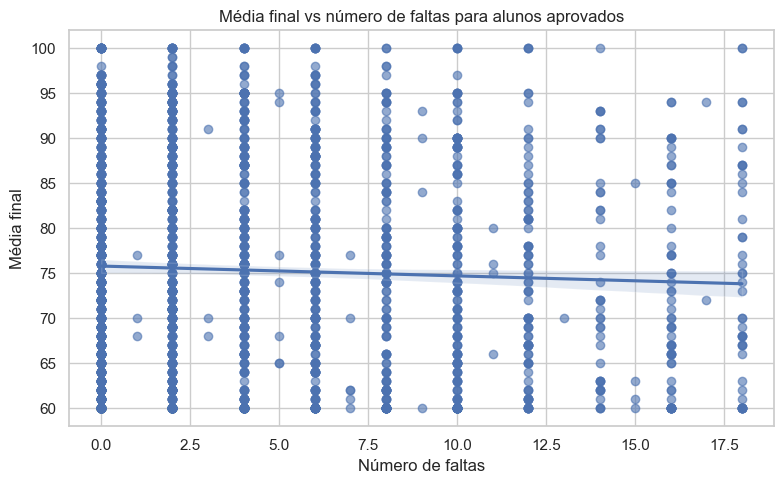

   MATR_ALUNO  SITUACAO  NUM_FALTAS  MEDIA_FINAL
0           1  Aprovado          12           77
3           4  Aprovado           2           60
4           4  Aprovado           2           68
5           5  Aprovado           4           60
6           5  Aprovado           8           97


In [11]:
#%% 

# 1) Filtrar apenas alunos Aprovados
df_reg = df[df['SITUACAO'] == "Aprovado"].copy()

# 2) Remover possíveis NaN nas variáveis de interesse
df_reg = df_reg.dropna(subset=['NUM_FALTAS', 'MEDIA_FINAL'])

# 3) Definir X (faltas) e Y (média final)
x = df_reg['NUM_FALTAS']
y = df_reg['MEDIA_FINAL']

# 4) Regressão linear simples: MEDIA_FINAL ~ NUM_FALTAS
reg = linregress(x, y)

print('=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===')
print(f'Inclinação (beta1): {reg.slope:.4f}')
print(f'Intercepto (beta0): {reg.intercept:.4f}')
print(f'Coeficiente de correlação (r): {reg.rvalue:.4f}')
print(f'R²: {reg.rvalue**2:.4f}')
print(f'Erro padrão da inclinação: {reg.stderr:.4f}')
print(f'p-valor da inclinação: {reg.pvalue:.4g}')

# 5) Teste de hipótese para a inclinação
alpha = 0.05  # nível de significância

print('\n=== Teste de hipótese para a tendência ===')
print('H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)')
print('H1: beta1 ≠ 0 (há relação linear entre faltas e média)')

if reg.pvalue < alpha:
    print(f'Rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Há evidência estatística de tendência linear entre número de faltas e média final.')
else:
    print(f'Não rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Não há evidência estatística suficiente de tendência linear.')

# 6) Plotar pontos + reta de regressão
plt.figure(figsize=(8, 5))
sns.regplot(
    x=x,
    y=y,
    ci=95,                 # intervalo de confiança da reta
    scatter_kws={'alpha': 0.6}
)

plt.title('Média final vs número de faltas para alunos aprovados')
plt.xlabel('Número de faltas')
plt.ylabel('Média final')
plt.tight_layout()
plt.show()

# (Opcional) ver algumas linhas
print(df_reg[['MATR_ALUNO', 'SITUACAO', 'NUM_FALTAS', 'MEDIA_FINAL']].head())

=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===
Inclinação (beta1): -0.4636
Intercepto (beta0): 29.4551
Coeficiente de correlação (r): -0.1566
R²: 0.0245
Erro padrão da inclinação: 0.0875
p-valor da inclinação: 1.427e-07

=== Teste de hipótese para a tendência ===
H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)
H1: beta1 ≠ 0 (há relação linear entre faltas e média)
Rejeitamos H0 ao nível de 5%.
→ Há evidência estatística de tendência linear entre número de faltas e média final.


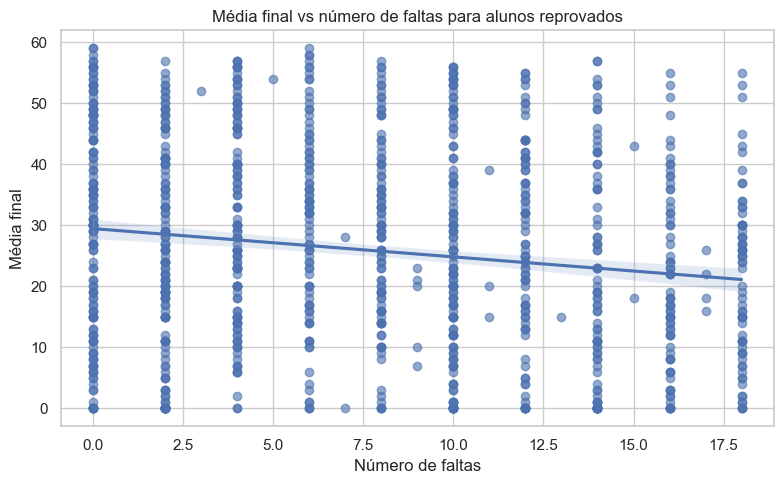

    MATR_ALUNO   SITUACAO  NUM_FALTAS  MEDIA_FINAL
20          17  Reprovado           4           27
21          17  Reprovado          14            0
36          23  Reprovado           0            0
40          24  Reprovado          14            7
42          26  Reprovado           2           53


In [12]:
#%% 

# 1) Filtrar apenas alunos Reprovados
df_reg = df[df['SITUACAO'] == "Reprovado"].copy()

# 2) Remover possíveis NaN nas variáveis de interesse
df_reg = df_reg.dropna(subset=['NUM_FALTAS', 'MEDIA_FINAL'])

# 3) Definir X (faltas) e Y (média final)
x = df_reg['NUM_FALTAS']
y = df_reg['MEDIA_FINAL']

# 4) Regressão linear simples: MEDIA_FINAL ~ NUM_FALTAS
reg = linregress(x, y)

print('=== Regressão linear: MEDIA_FINAL ~ NUM_FALTAS ===')
print(f'Inclinação (beta1): {reg.slope:.4f}')
print(f'Intercepto (beta0): {reg.intercept:.4f}')
print(f'Coeficiente de correlação (r): {reg.rvalue:.4f}')
print(f'R²: {reg.rvalue**2:.4f}')
print(f'Erro padrão da inclinação: {reg.stderr:.4f}')
print(f'p-valor da inclinação: {reg.pvalue:.4g}')

# 5) Teste de hipótese para a inclinação
alpha = 0.05  # nível de significância

print('\n=== Teste de hipótese para a tendência ===')
print('H0: beta1 = 0 (número de faltas não se relaciona linearmente com a média)')
print('H1: beta1 ≠ 0 (há relação linear entre faltas e média)')

if reg.pvalue < alpha:
    print(f'Rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Há evidência estatística de tendência linear entre número de faltas e média final.')
else:
    print(f'Não rejeitamos H0 ao nível de {alpha*100:.0f}%.')
    print('→ Não há evidência estatística suficiente de tendência linear.')

# 6) Plotar pontos + reta de regressão
plt.figure(figsize=(8, 5))
sns.regplot(
    x=x,
    y=y,
    ci=95,                 # intervalo de confiança da reta
    scatter_kws={'alpha': 0.6}
)

plt.title('Média final vs número de faltas para alunos reprovados')
plt.xlabel('Número de faltas')
plt.ylabel('Média final')
plt.tight_layout()
plt.show()

# (Opcional) ver algumas linhas
print(df_reg[['MATR_ALUNO', 'SITUACAO', 'NUM_FALTAS', 'MEDIA_FINAL']].head())

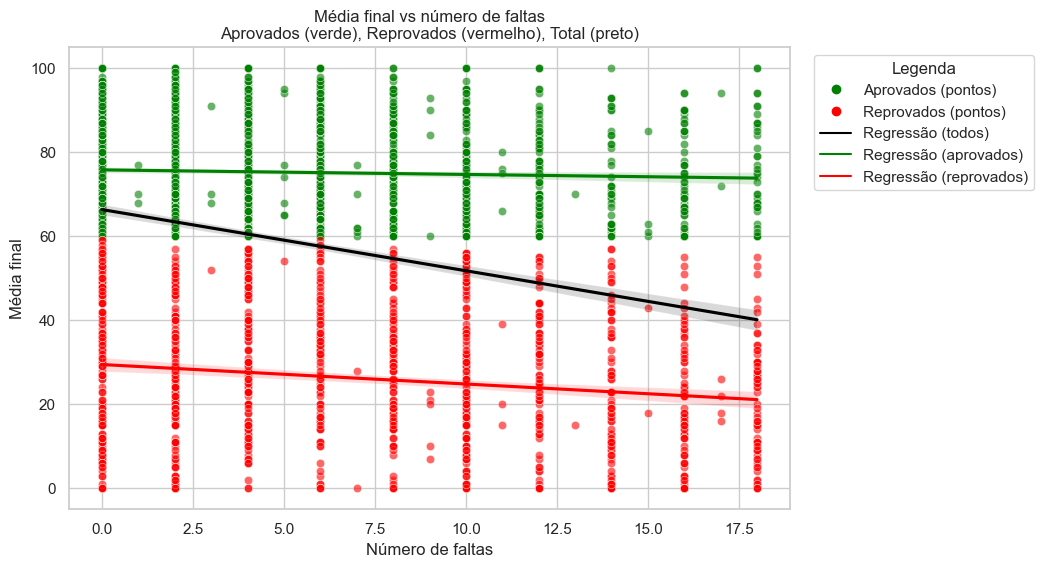

In [17]:
#%% Gráfico combinado: pontos + 3 regressões (todos, aprovados, reprovados)

from matplotlib.lines import Line2D


# 1) Filtrar apenas Aprovados e Reprovados e remover NaN
df_ar = df[df['SITUACAO'].isin(['Aprovado', 'Reprovado'])].copy()
df_ar = df_ar.dropna(subset=['NUM_FALTAS', 'MEDIA_FINAL'])

# Subconjuntos
df_aprov = df_ar[df_ar['SITUACAO'] == 'Aprovado']
df_reprov = df_ar[df_ar['SITUACAO'] == 'Reprovado']

# Figura um pouco maior pra caber legenda
fig, ax = plt.subplots(figsize=(11, 6))

# 2) Pontos: verde (Aprovado), vermelho (Reprovado)
sns.scatterplot(
    data=df_aprov,
    x='NUM_FALTAS',
    y='MEDIA_FINAL',
    color='green',
    alpha=0.6,
    ax=ax,
    legend=False
)

sns.scatterplot(
    data=df_reprov,
    x='NUM_FALTAS',
    y='MEDIA_FINAL',
    color='red',
    alpha=0.6,
    ax=ax,
    legend=False
)

# 3) Linha de regressão TOTAL (preta)
sns.regplot(
    data=df_ar,
    x='NUM_FALTAS',
    y='MEDIA_FINAL',
    scatter=False,
    ci=95,
    line_kws={'color': 'black'},
    ax=ax
)

# 4) Linha de regressão APROVADOS (verde)
sns.regplot(
    data=df_aprov,
    x='NUM_FALTAS',
    y='MEDIA_FINAL',
    scatter=False,
    ci=95,
    line_kws={'color': 'green'},
    ax=ax
)

# 5) Linha de regressão REPROVADOS (vermelha)
sns.regplot(
    data=df_reprov,
    x='NUM_FALTAS',
    y='MEDIA_FINAL',
    scatter=False,
    ci=95,
    line_kws={'color': 'red'},
    ax=ax
)

# 6) Legenda manual (pontos + linhas)
legend_elements = [
    Line2D([], [], marker='o', linestyle='', color='green', label='Aprovados (pontos)'),
    Line2D([], [], marker='o', linestyle='', color='red',   label='Reprovados (pontos)'),
    Line2D([], [], linestyle='-', color='black', label='Regressão (todos)'),
    Line2D([], [], linestyle='-', color='green', label='Regressão (aprovados)'),
    Line2D([], [], linestyle='-', color='red',   label='Regressão (reprovados)'),
]

# reserva um espaço à direita pro plot não “apertar”
plt.subplots_adjust(right=0.78)

ax.legend(
    handles=legend_elements,
    title='Legenda',
    loc='upper right',       # canto superior direito
    bbox_to_anchor=(1.35, 1) # um pouco pra fora do eixo
)

# 7) Ajustes de rótulos e título
plt.title('Média final vs número de faltas\nAprovados (verde), Reprovados (vermelho), Total (preto)')
plt.xlabel('Número de faltas')
plt.ylabel('Média final')

plt.show()


